In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the datasets
customers_df = pd.read_csv('Datasets/Customers.csv')
products_df = pd.read_csv('Datasets/Products.csv')
transactions_df = pd.read_csv('Datasets/Transactions.csv')

In [4]:
# Data Cleaning and Preprocessing
# Customers Data
customers_df.rename(columns={'CustomerID': 'CustomerID'}, inplace=True) # Removing BOM from CustomerID column
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

# Products Data
products_df.rename(columns={'ProductID': 'ProductID'}, inplace=True) # Removing BOM from ProductID column

# Transactions Data
transactions_df.rename(columns={'TransactionID': 'TransactionID'}, inplace=True) # Removing BOM from TransactionID column
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

--- Customers Dataset Exploration ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22

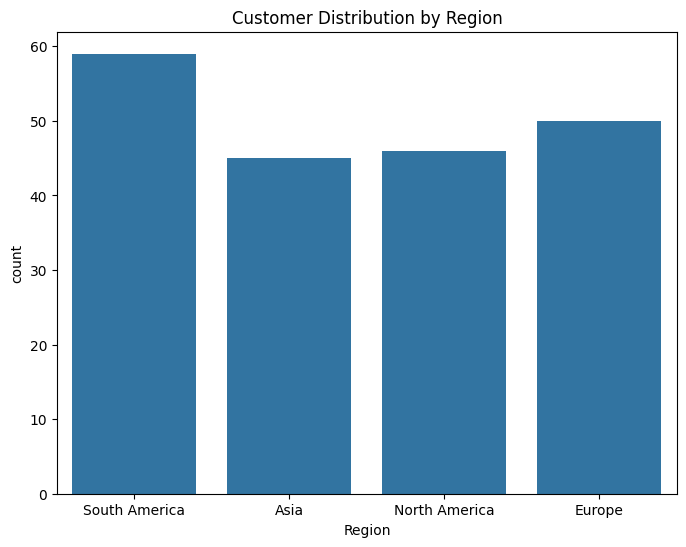

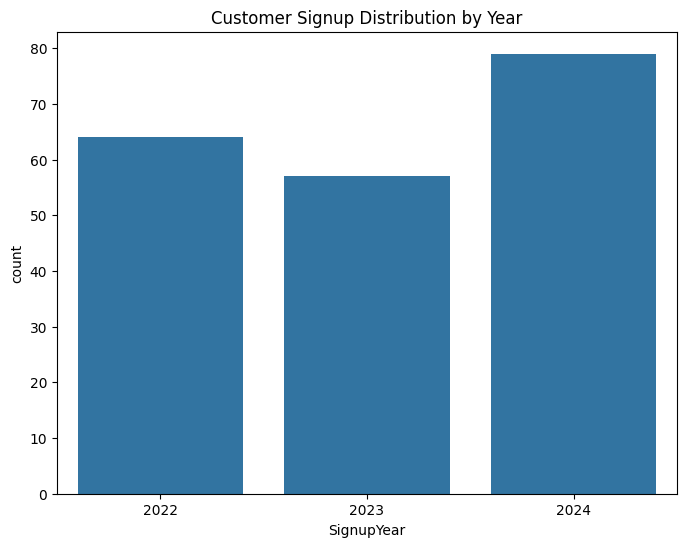

In [5]:
# --- Exploratory Data Analysis ---

# 1. Customers Dataset Exploration
print("--- Customers Dataset Exploration ---")
print(customers_df.info())
print(customers_df.describe(include='all'))
print(customers_df.isnull().sum())
print(customers_df['Region'].value_counts())

# Region Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=customers_df, x='Region')
plt.title('Customer Distribution by Region')
plt.show()


# Signup Year Distribution
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year
plt.figure(figsize=(8, 6))
sns.countplot(data=customers_df, x='SignupYear')
plt.title('Customer Signup Distribution by Year')
plt.show()



--- Products Dataset Exploration ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
5

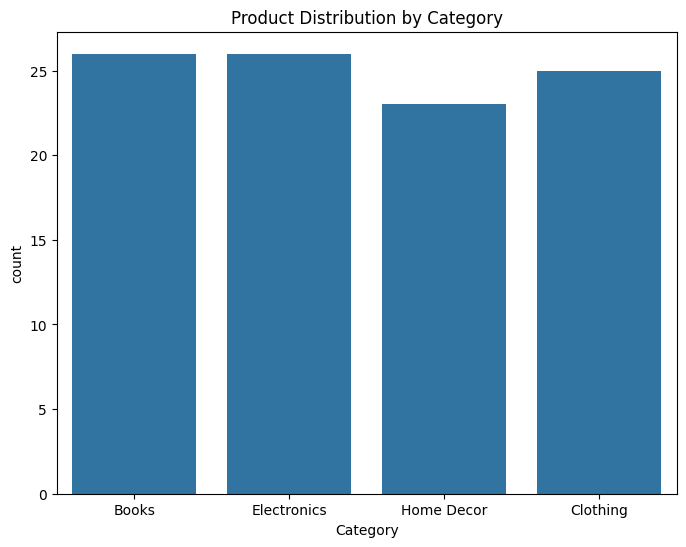

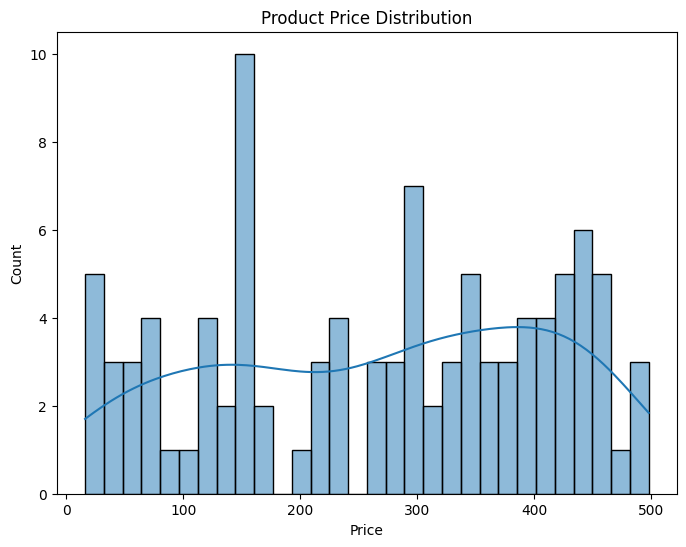

In [6]:
# 2. Products Dataset Exploration
print("\n--- Products Dataset Exploration ---")
print(products_df.info())
print(products_df.describe(include='all'))
print(products_df.isnull().sum())
print(products_df['Category'].value_counts())

# Category Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=products_df, x='Category')
plt.title('Product Distribution by Category')
plt.show()

# Price Distribution
plt.figure(figsize=(8, 6))
sns.histplot(products_df['Price'], bins=30, kde=True)
plt.title('Product Price Distribution')
plt.show()



--- Transactions Dataset Exploration ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000  

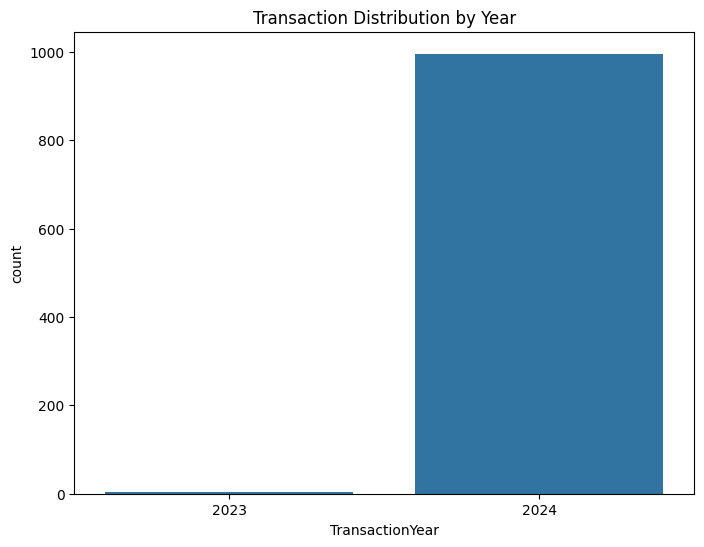

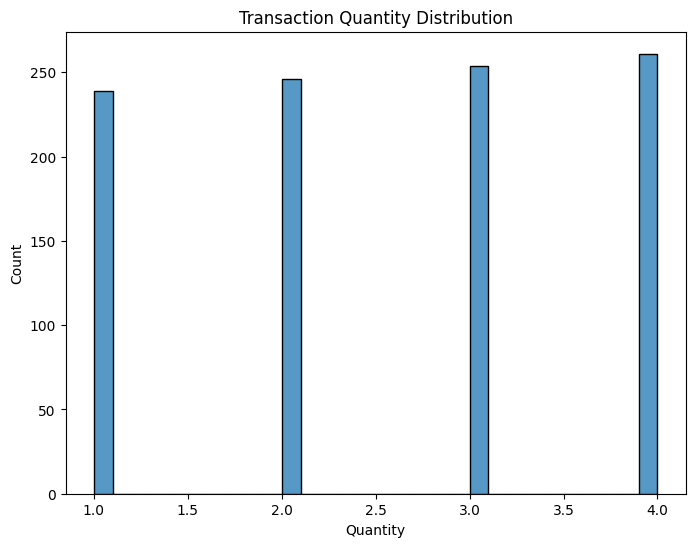

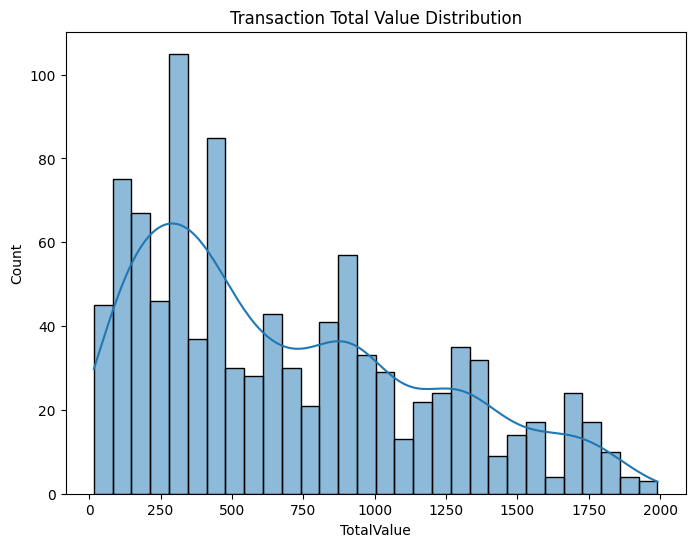

In [7]:
# 3. Transactions Dataset Exploration
print("\n--- Transactions Dataset Exploration ---")
print(transactions_df.info())
print(transactions_df.describe())
print(transactions_df.isnull().sum())

# Transaction Year Distribution
transactions_df['TransactionYear'] = transactions_df['TransactionDate'].dt.year
plt.figure(figsize=(8, 6))
sns.countplot(data=transactions_df, x='TransactionYear')
plt.title('Transaction Distribution by Year')
plt.show()

# Quantity Distribution
plt.figure(figsize=(8, 6))
sns.histplot(transactions_df['Quantity'], bins=30, kde=False)
plt.title('Transaction Quantity Distribution')
plt.show()

# Total Value Distribution
plt.figure(figsize=(8, 6))
sns.histplot(transactions_df['TotalValue'], bins=30, kde=True)
plt.title('Transaction Total Value Distribution')
plt.show()


Region-wise Total Transaction Value:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


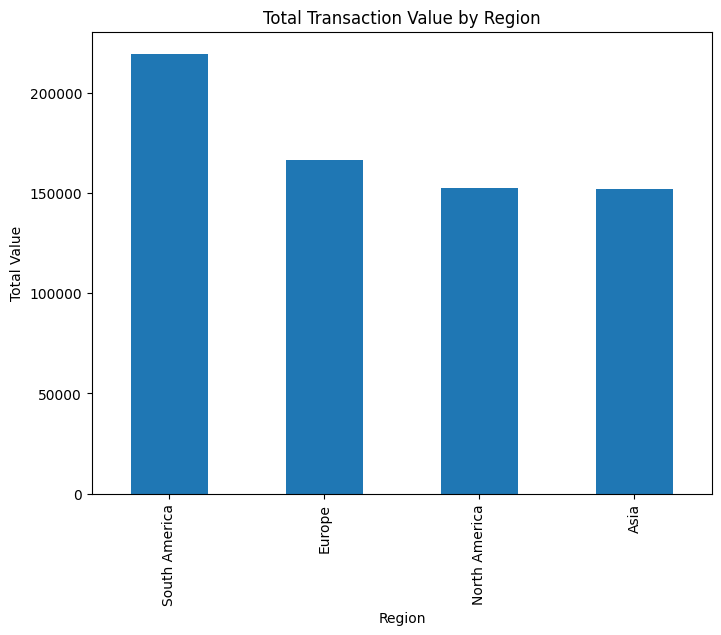


Monthly Transaction Trend:
 TransactionDate
2023-12-31      4
2024-01-31    107
2024-02-29     77
2024-03-31     80
2024-04-30     86
2024-05-31     86
2024-06-30     69
2024-07-31     96
2024-08-31     94
2024-09-30     96
2024-10-31     70
2024-11-30     57
2024-12-31     78
Freq: ME, Name: TransactionID, dtype: int64


C:\Users\anshuk\AppData\Local\Temp\ipykernel_15608\1771249122.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = transactions_df.set_index('TransactionDate').resample('M')['TransactionID'].count()


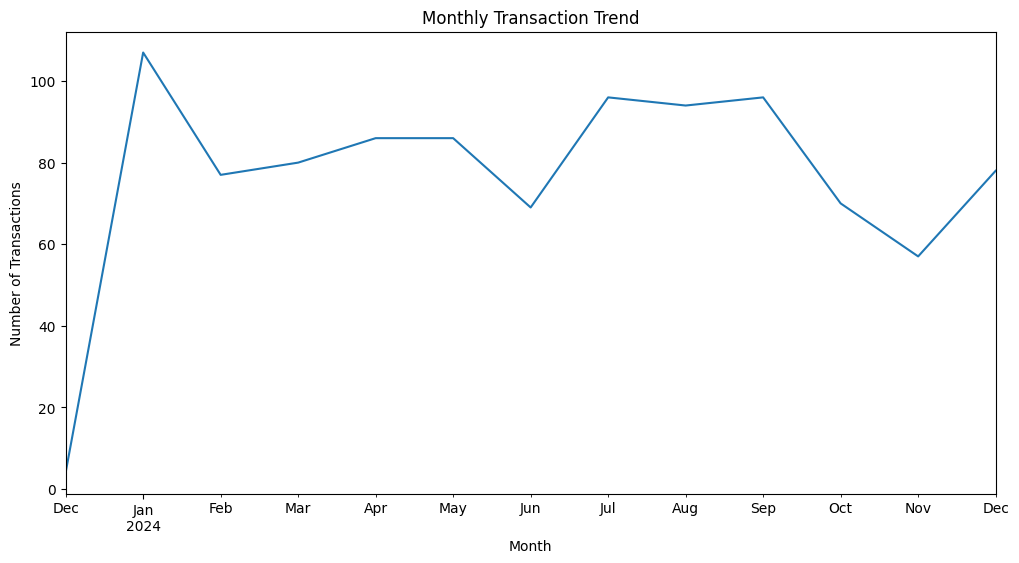

In [8]:
# 4. Merged Data Exploration (Customer + Transactions)
merged_customer_transaction_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')

# Region-wise Transaction Analysis
region_transaction_value = merged_customer_transaction_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRegion-wise Total Transaction Value:\n", region_transaction_value)
plt.figure(figsize=(8, 6))
region_transaction_value.plot(kind='bar')
plt.title('Total Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Total Value')
plt.show()


# Monthly Transaction Trend
monthly_transactions = transactions_df.set_index('TransactionDate').resample('M')['TransactionID'].count()
print("\nMonthly Transaction Trend:\n", monthly_transactions)
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='line')
plt.title('Monthly Transaction Trend')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()



Category-wise Total Transaction Value:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


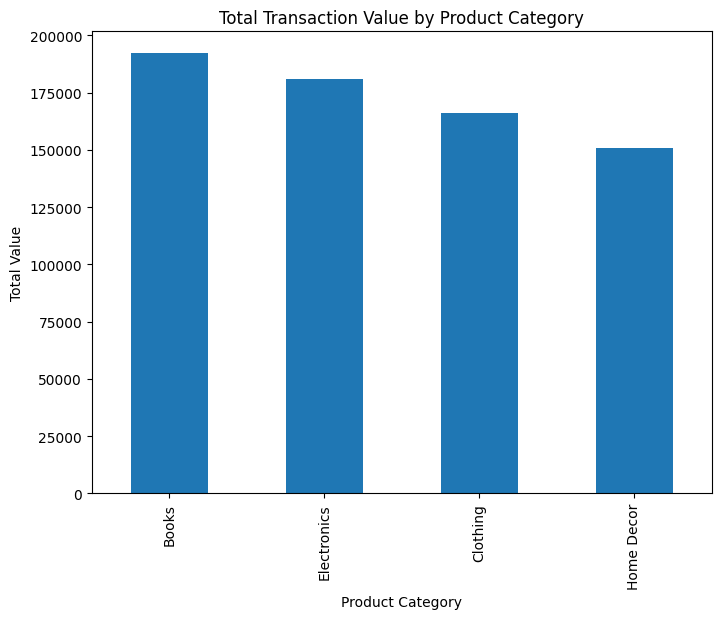


Category-wise Total Quantity Sold:
 Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


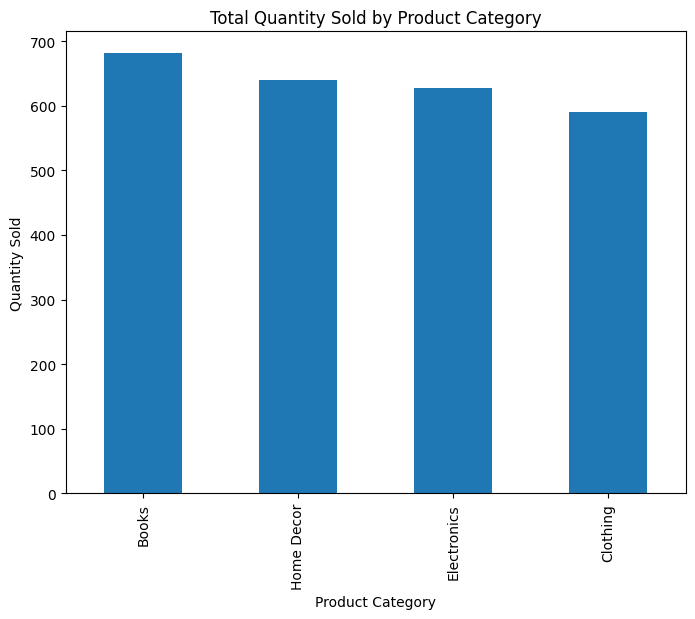


EDA completed. Business insights will be provided in the PDF report.


In [9]:
# 5. Merged Data Exploration (Product + Transactions)
merged_product_transaction_df = pd.merge(transactions_df, products_df, on='ProductID', how='left')

# Category-wise Transaction Analysis
category_transaction_value = merged_product_transaction_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nCategory-wise Total Transaction Value:\n", category_transaction_value)
plt.figure(figsize=(8, 6))
category_transaction_value.plot(kind='bar')
plt.title('Total Transaction Value by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Value')
plt.show()

# Category-wise Quantity Analysis
category_quantity_sold = merged_product_transaction_df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print("\nCategory-wise Total Quantity Sold:\n", category_quantity_sold)
plt.figure(figsize=(8, 6))
category_quantity_sold.plot(kind='bar')
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.show()


print("\nEDA completed. Business insights will be provided in the PDF report.")